# Test 1 
# 1 Light Fission Fragment with a set position and momentum 
# No Dead Layer

### 1 fission product Br (Z=35, A=80, E_k = 162.5 MeV)


In [1]:
import ROOT 

Welcome to JupyROOT 6.18/02


In [2]:
f = ROOT.TFile.Open("/home/yulia/Desktop/tasispec/build/PICOSpec_run0_162_80_no_dead.root")
# 1 particle, no dead layer
rawTree = f.Get("PICO_tree_raw")

## Print full event 

In [3]:
rawTree.Print()

******************************************************************************
*Tree    :PICO_tree_raw: TTree contain PICOSpec RAW event info                  *
*Entries :        1 : Total =            4831 bytes  File  Size =       1797 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :Mult      : Mult/I                                                 *
*Entries :        1 : Total  Size=        565 bytes  File Size  =         84 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :det_ID    : detector_ID[Mult]/I                                    *
*Entries :        1 : Total  Size=        698 bytes  File Size  =        114 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*................................................

In [4]:
E_event = []
for event in rawTree:
    print('New event')
    print(event.Mult)
    for i in range(event.Mult):
        E_event.append(event.Energy[i])
        print(event.Energy[i], event.det_ID[i])
        
E_total = sum(E_event)
print('Total energy:', E_total)

New event
5
66478.06429931079 561
38371.59645525094 1860
1.927882215517132 1860
173.30265742605496 595
21.157845284214577 1860
Total energy: 105046.04913948751


## Implant detector histogram

Detector ID:  561
66478.06429931079
Detector ID:  595
173.30265742605496


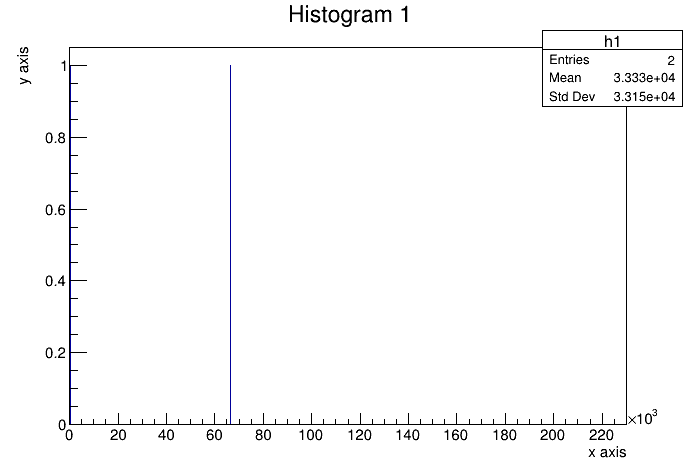

In [5]:
c1 = ROOT.TCanvas('c1', 'canvas title')
h1 = ROOT.TH1F("h1", 'Histogram 1; x axis; y axis', 10000, 0, 230000)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 1024:
            print('Detector ID: ', event.det_ID[i]) 
            print(event.Energy[i])
            h1.Fill(event.Energy[i])

h1.Draw()
c1.Update()
c1.Draw()

Energy in implant: 66.5 MeV

## Box detector 

Detector ID:  1860
38371.59645525094
Detector ID:  1860
1.927882215517132
Detector ID:  1860
21.157845284214577


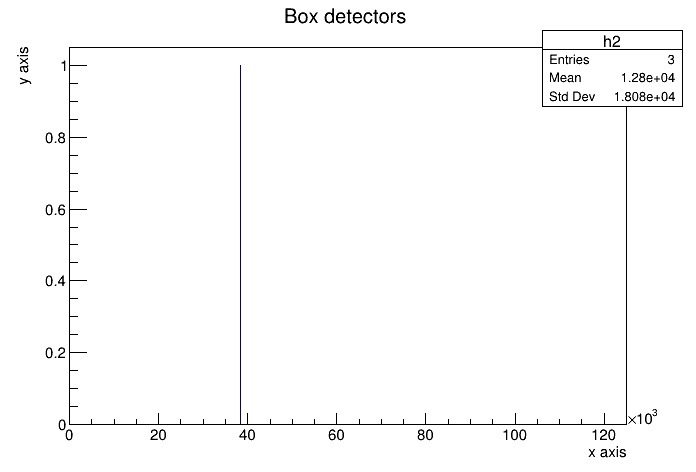

In [6]:
c2 = ROOT.TCanvas('c2', 'canvas title')
h2 = ROOT.TH1F("h2", 'Box detectors; x axis; y axis', 10000, 0, 125000)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 1024 < event.det_ID[i] < 2048:
            print('Detector ID: ', event.det_ID[i]) 
            print(event.Energy[i])
            h2.Fill(event.Energy[i])

h2.Draw()
c2.Update()
c2.Draw()
        

Energy in box: 38.4 MeV

In [7]:
E_imp_final = []
E_box_final = []
for event in rawTree:
    print('New event')
    E_imp = []
    E_box = []
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 2048:
            if 0 < event.det_ID[i] < 1024:  # event in implantation detector  
                E_imp.append(event.Energy[i]) 
            if 1024 < event.det_ID[i] < 2048: # event in box detector
                E_box.append(event.Energy[i]) 
    if (E_imp and E_box):
        print('E_imp per event: ', E_imp)
        print('E_box per event: ', E_box)
        E_imp_final.append(max(E_imp))
        E_box_final.append(max(E_box))

New event
E_imp per event:  [66478.06429931079, 173.30265742605496]
E_box per event:  [38371.59645525094, 1.927882215517132, 21.157845284214577]


<IPython.core.display.Javascript object>


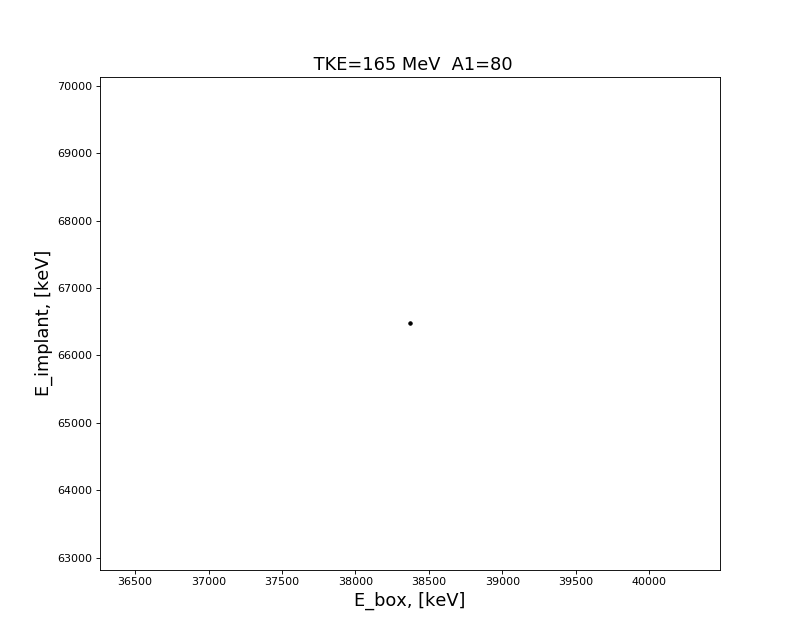

For N=2500 runs


In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(E_box_final, E_imp_final, '.', color='black');
plt.title(' TKE=165 MeV  A1=80', fontsize=16)
plt.xlabel('E_box, [keV]', fontsize=16)
plt.ylabel('E_implant, [keV]', fontsize=16)

print("For N=2500 runs")

# Conclusion 

In [9]:
print('Energy registered in the implantation detector per event:')
print(E_imp)
E_imp_fission = max(E_imp)
print('Due to fission product:', E_imp_fission)
print('Energy registered in the box detectors per event:')
print(E_box)
E_box_fission = max(E_box)
print('Due to fission product:', E_box_fission)
print('Total energy of fission product registered:', E_imp_fission + E_box_fission )

Energy registered in the implantation detector per event:
[66478.06429931079, 173.30265742605496]
Due to fission product: 66478.06429931079
Energy registered in the box detectors per event:
[38371.59645525094, 1.927882215517132, 21.157845284214577]
Due to fission product: 38371.59645525094
Total energy of fission product registered: 104849.66075456173


### 105 MeV are registered by detectors out of 125 MeV
### Light fission product is not completely stopped in the detector!!!

##################################################################################################################

# Test 2 
# 1 Light Fission Fragment with a set position and momentum 
# With Dead Layer

### 1 fission product Br (Z=35, A=80, E_k = 162.5 MeV)

In [10]:
f = ROOT.TFile.Open("/home/yulia/Desktop/tasispec/build/PICOSpec_run0_162_80_dead.root")
# 1 particle, dead layer
rawTree = f.Get("PICO_tree_raw")

## Print full event 

In [11]:
E_event = []
for event in rawTree:
    print('New event')
    print(event.Mult)
    for i in range(event.Mult):
        E_event.append(event.Energy[i])
        print(event.Energy[i], event.det_ID[i])
        
E_total = sum(E_event)
print('Total energy:', E_total)

New event
5
66478.06429931079 561
38371.59645525094 1860
1.927882215517132 1860
173.30265742605496 595
21.157845284214577 1860
Total energy: 105046.04913948751


Detector ID:  561
Detector ID:  595


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


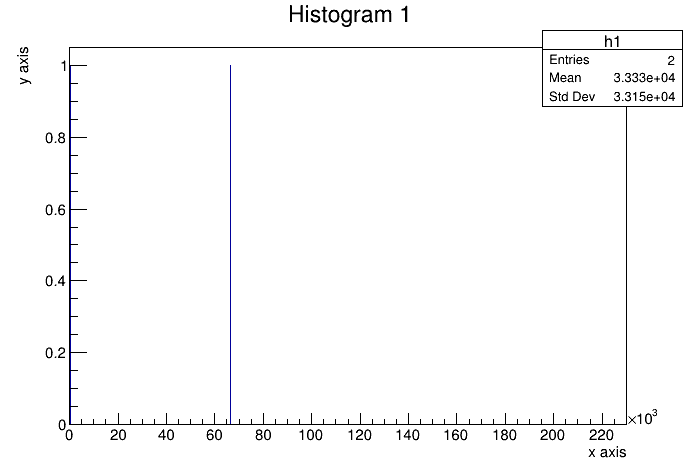

In [12]:
c1 = ROOT.TCanvas('c1', 'canvas title')
h1 = ROOT.TH1F("h1", 'Histogram 1; x axis; y axis', 10000, 0, 230000)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 1024:
            print('Detector ID: ', event.det_ID[i]) 
            #print(event.Energy[i])
            h1.Fill(event.Energy[i])

h1.Draw()
c1.Update()
c1.Draw()

Detector ID:  1860
38371.59645525094
Detector ID:  1860
1.927882215517132
Detector ID:  1860
21.157845284214577


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


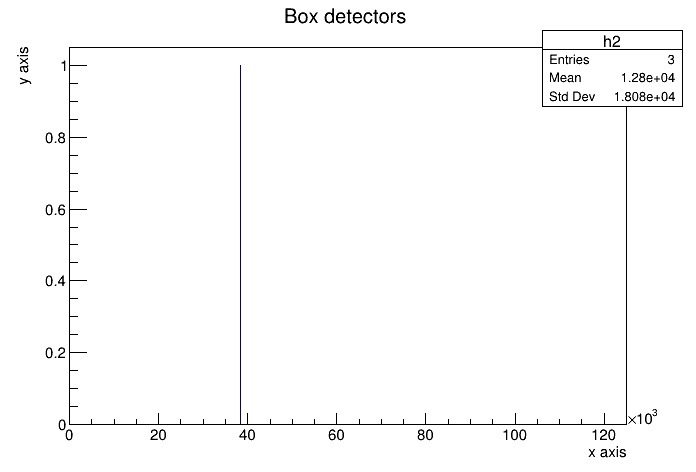

In [13]:
c2 = ROOT.TCanvas('c2', 'canvas title')
h2 = ROOT.TH1F("h2", 'Box detectors; x axis; y axis', 10000, 0, 125000)
for event in rawTree:
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 1024 < event.det_ID[i] < 2048:
            print('Detector ID: ', event.det_ID[i]) 
            print(event.Energy[i])
            h2.Fill(event.Energy[i])

h2.Draw()
c2.Update()
c2.Draw()

In [14]:
E_imp_final = []
E_box_final = []
for event in rawTree:
    print('New event')
    E_imp = []
    E_box = []
    #print(event.Energy, event.Mult) 
    for i in range(event.Mult):
        if 0 < event.det_ID[i] < 2048:
            if 0 < event.det_ID[i] < 1024:  # event in implantation detector  
                E_imp.append(event.Energy[i]) 
            if 1024 < event.det_ID[i] < 2048: # event in box detector
                E_box.append(event.Energy[i]) 
    if (E_imp and E_box):
        print('E_imp per event: ', E_imp)
        print('E_box per event: ', E_box)
        E_imp_final.append(max(E_imp))
        E_box_final.append(max(E_box))

New event
E_imp per event:  [66478.06429931079, 173.30265742605496]
E_box per event:  [38371.59645525094, 1.927882215517132, 21.157845284214577]


<IPython.core.display.Javascript object>


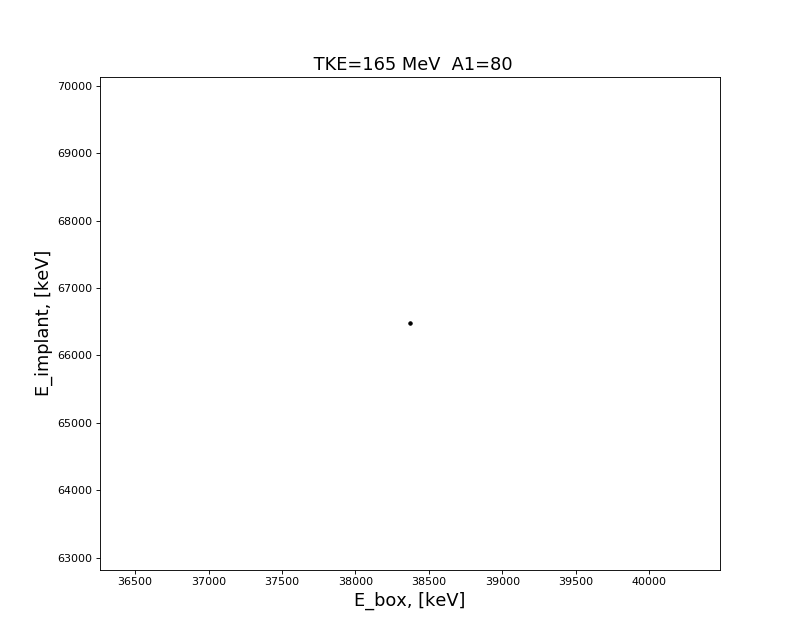

For N=2500 runs


In [15]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(E_box_final, E_imp_final, '.', color='black');
plt.title(' TKE=165 MeV  A1=80', fontsize=16)
plt.xlabel('E_box, [keV]', fontsize=16)
plt.ylabel('E_implant, [keV]', fontsize=16)

print("For N=2500 runs")

In [16]:
print('Energy registered in the implantation detector per event:')
print(E_imp)
E_imp_fission = max(E_imp)
print('Due to fission product:', E_imp_fission)
print('Energy registered in the box detectors per event:')
print(E_box)
E_box_fission = max(E_box)
print('Due to fission product:', E_box_fission)
print('Total energy of fission product registered:', E_imp_fission + E_box_fission )

Energy registered in the implantation detector per event:
[66478.06429931079, 173.30265742605496]
Due to fission product: 66478.06429931079
Energy registered in the box detectors per event:
[38371.59645525094, 1.927882215517132, 21.157845284214577]
Due to fission product: 38371.59645525094
Total energy of fission product registered: 104849.66075456173
